<a href="https://colab.research.google.com/github/TusharGwal/Machine-Learning/blob/main/Regression/multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

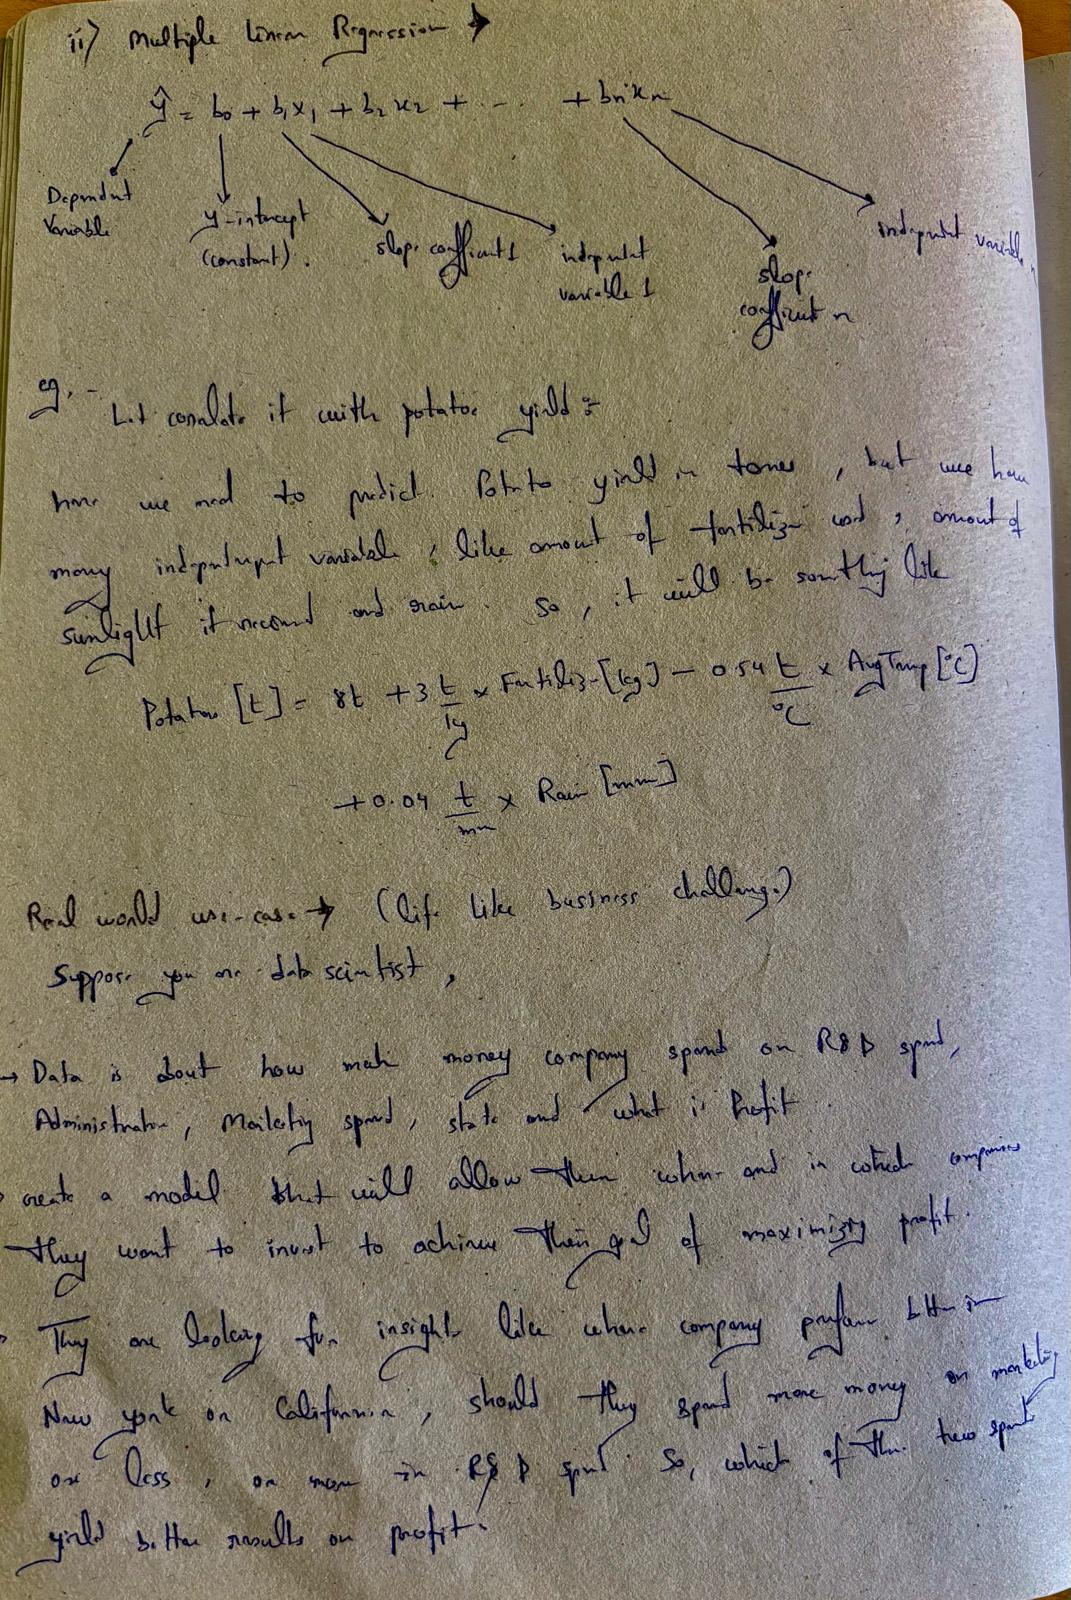

In [ ]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [ ]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Encoding categorical data

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Let's break down this scikit-learn syntax line by line. It's used for **One-Hot Encoding a specific column** in a dataset while **keeping the rest of the columns unchanged**. Here's the code again:

```python
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
```

---

## 🔍 Step-by-Step Explanation

### 1️⃣ `from sklearn.compose import ColumnTransformer`

* **Purpose**: Imports the `ColumnTransformer` class, which allows you to **apply different preprocessing techniques to different columns** of your data.

---

### 2️⃣ `from sklearn.preprocessing import OneHotEncoder`

* **Purpose**: Imports the `OneHotEncoder`, which converts categorical column(s) into a format that can be provided to ML algorithms (binary vectors).

---

### 3️⃣ `ct = ColumnTransformer(...)`

```python
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])],
    remainder='passthrough'
)
```

* **`transformers=[...]`**: A list of tuples. Each tuple defines:

  * `'encoder'`: Just a **name** for this transformation step (can be anything).
  * `OneHotEncoder()`: The transformation **to apply** (i.e., convert categorical values into binary vectors).
  * `[3]`: The **column index(es)** to apply it to — in this case, column 3 (0-based indexing).

* **`remainder='passthrough'`**:

  * This tells `ColumnTransformer` to **leave the rest of the columns unchanged**.
  * If you set this to `'drop'`, it would discard all columns not being transformed.

✅ So this line creates a transformer that will **one-hot encode column 3** and leave all other columns intact.

---

### 4️⃣ `X = np.array(ct.fit_transform(X))`

* `ct.fit_transform(X)`:

  * Applies the column transformer `ct` on the dataset `X`.
  * Internally:

    * **Fits** the `OneHotEncoder` to column 3 of `X`
    * **Transforms** the column (i.e., replaces it with one-hot vectors)
    * **Concatenates** the untouched columns (thanks to `remainder='passthrough'`)

* `np.array(...)`:

  * Converts the resulting transformed data (which might be a sparse matrix) into a NumPy array.

---

## 📌 Example

If your original `X` looks like:

```python
[['France', 44, 72000],
 ['Germany', 40, 65000],
 ['Spain', 38, 61000]]
```

And column `0` (countries) is encoded (if you changed `[3]` to `[0]`), then after OneHotEncoding:

```python
[[1.0, 0.0, 0.0, 44, 72000],
 [0.0, 1.0, 0.0, 40, 65000],
 [0.0, 0.0, 1.0, 38, 61000]]
```

---

## ✅ Summary

| Code                | Meaning                                                 |
| ------------------- | ------------------------------------------------------- |
| `ColumnTransformer` | Allows you to apply transformations to specific columns |
| `OneHotEncoder()`   | Encodes categorical column into binary format           |
| `[3]`               | Applies encoder to column index 3                       |
| `'passthrough'`     | Keeps remaining columns as-is                           |
| `fit_transform(X)`  | Applies the transformation to the dataset               |
| `np.array(...)`     | Ensures clean NumPy array output                        |

---


In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Explain the code ?**

Let’s break this code down and explain what’s happening step by step. This is a standard approach for **splitting your dataset** into training and testing sets before training a machine learning model.

---

### 🧠 Code

```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
```

---

### ✅ Line-by-Line Explanation

#### 🔹 `from sklearn.model_selection import train_test_split`

* This imports the **`train_test_split` function** from Scikit-learn, used to split your dataset into **training** and **testing** subsets.

---

#### 🔹 `train_test_split(X, y, ...)`

This function splits your:

* `X`: feature matrix (inputs)
* `y`: target vector (labels or outputs)

into:

* `X_train`: input features for training
* `X_test`: input features for testing
* `y_train`: target values for training
* `y_test`: target values for testing

---

#### 🔹 `test_size=0.2`

* This means **20%** of the total dataset will be used as the **test set**, and the remaining **80%** will be used for **training**.
* You can also use a number (e.g., `test_size=50` to get exactly 50 test samples).

---

#### 🔹 `random_state=0`

* This sets a **random seed** to ensure that your data is split **the same way every time you run the code**.
* It makes your results **reproducible**.
* Changing this number will give you a different random split.

---

### 📌 Why This Split?

Machine learning models are trained on the **training set** and evaluated on the **test set** to check how well the model generalizes to **unseen data**.

---

### 🧪 Example:

Let’s say your data `X` has 100 rows and `test_size = 0.2`:

* `X_train` will have 80 rows
* `X_test` will have 20 rows
* `y_train` and `y_test` will align with `X_train` and `X_test`, respectively

---

### ✅ Summary Table

| Component        | Purpose                                          |
| ---------------- | ------------------------------------------------ |
| `X`              | Full dataset of features (independent variables) |
| `y`              | Full dataset of labels (dependent variable)      |
| `X_train`        | Features for training the model                  |
| `X_test`         | Features for evaluating the model                |
| `y_train`        | Labels used to train the model                   |
| `y_test`         | Labels used to test the model                    |
| `test_size=0.2`  | 20% test split                                   |
| `random_state=0` | Ensures reproducibility                          |

---

**Can you explain this more random_state=0 ?**

Absolutely! Let’s go deeper into what `random_state=0` means in `train_test_split` and why it matters.

---

### 🔢 What is `random_state`?

The `random_state` parameter **controls the randomness** of the data splitting process. Think of it as a **seed** for a random number generator.

When splitting a dataset, `train_test_split()` randomly selects samples to go into the training and test sets. If you don’t fix the randomness, you'll get **different splits every time you run the code** — which makes it hard to reproduce your results.

---

### ✅ Why use `random_state=0`?

Using a fixed value like `0` (or any integer like `42`, `100`, etc.):

* Ensures **the same split every time**
* Makes your model results **reproducible**
* Helps you compare models **fairly**, since they are trained/tested on the **same data splits**

---

### 🔁 What happens without `random_state`?

```python
# Without setting random_state
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2)

# Run again...
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2)
```

Each time, `X_train1 ≠ X_train2` — the split will be different.

But if you do:

```python
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=0)
```

Now `X_train1 == X_train2` — they’ll be **exactly the same**.

---

### 🧪 Why `random_state=0` and not `42`?

* The choice of `0` or `42` or any other number doesn’t matter **as long as it stays fixed**.
* `42` is just a popular "nerd joke" (from *The Hitchhiker's Guide to the Galaxy*) but `0` works just the same.

---

### ✅ Summary

| Parameter        | Purpose                                            |
| ---------------- | -------------------------------------------------- |
| `random_state`   | Controls the randomness of the split               |
| `random_state=0` | Fixes the seed so the split is always the same     |
| Useful for       | Reproducibility, consistent experiments, debugging |

---


## Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


Let me explain this more **slowly** and **visually** like a teacher would. Here's the code again:

```python
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))
```

---

## 🎯 What Is This Code Trying to Do?

👉 You trained a machine learning model using training data.
Now you're saying:
**“Hey model, predict the outputs for the test inputs (`X_test`) and compare it to the actual outputs (`y_test`).”**

This code prints a side-by-side comparison of:

* ✅ What the model **predicted**
* 🧠 What the **true/actual** values were

---

## 🔍 Step-by-Step

---

### 1️⃣ `y_pred = regressor.predict(X_test)`

You trained a model like this earlier:

```python
regressor = LinearRegression()
regressor.fit(X_train, y_train)
```

Now you are asking the model to make predictions for the **test data**:

```python
y_pred = regressor.predict(X_test)
```

🧠 Now `y_pred` is a list of values like this:

```python
[162.25, 158.73, 172.04, ...]   ← predicted values by your model
```

---

### 2️⃣ `np.set_printoptions(precision=2)`

This tells Python:

> "When you print a NumPy array, round the numbers to 2 decimal places."

So instead of printing:

```
[162.24535683, 158.72793747, ...]
```

It shows:

```
[162.25, 158.73, ...]
```

✅ **Just for pretty output** — it doesn't change your data.

---

### 3️⃣ Reshaping with `.reshape(len(...), 1)`

Right now both `y_pred` and `y_test` look like this (1 row, many values):

```
[162.25, 158.73, 172.04, 155.90, ...]  ← shape: (n, ) → 1D
```

To combine them **side-by-side**, we need to make them into **column format** (2D):

```python
# y_pred becomes:
[[162.25],
 [158.73],
 [172.04],
 ...]

# y_test becomes:
[[160.00],
 [155.00],
 [170.00],
 ...]
```

This is done using:

```python
y_pred.reshape(len(y_pred), 1)
y_test.reshape(len(y_test), 1)
```

---

### 4️⃣ `np.concatenate((..., ...), axis=1)`

Now you want to **stick these two columns side-by-side**:

```python
[[162.25 160.00]   ← prediction vs actual
 [158.73 155.00]
 [172.04 170.00]
 ...]
```

This is exactly what:

```python
np.concatenate((y_pred_column, y_test_column), axis=1)
```

does.

---

### 5️⃣ `print(...)`

Finally, you print this nice clean result:

| Predicted | Actual |
| --------- | ------ |
| 162.25    | 160.0  |
| 158.73    | 155.0  |
| 172.04    | 170.0  |

---

## 💡 Why Do We Do This?

To **visually compare** how well your model did.

If predicted and actual values are **very close**, your model is doing well.
If they’re far apart, maybe your model needs improvement.

---

## ✋ In Simple Terms

Think of this code as:

> “Hey model, predict the prices, and show me a table comparing what you predicted vs what really happened.”

---



# Question 1: How do I use my multiple linear regression model to make a single prediction, for example, the profit of a startup with R&D Spend = 160000, Administration Spend = 130000, Marketing Spend = 300000 and State = California?

In [ ]:
print(regressor.predict([[1, 0, 0, 160000, 130000, 300000]]))

[181566.92]


Therefore, our model predicts that the profit of a Californian startup which spent 160000 in R&D, 130000 in Administration and 300000 in Marketing is $ 181566,92.

Important note 1: Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array. Simply put:

1,0,0,160000,130000,300000→scalars

[1,0,0,160000,130000,300000]→1D array

[[1,0,0,160000,130000,300000]]→2D array

Important note 2: Notice also that the "California" state was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the second row of the matrix of features X, "California" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, not the last three ones, because the dummy variables are always created in the first columns.

Question 2: How do I get the final regression equation y = b0 + b1 x1 + b2 x2 + ... with the final values of the coefficients?

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
42467.52924853278


Therefore, the equation of our multiple linear regression model is:

Profit=86.6×Dummy State 1−873×Dummy State 2+786×Dummy State 3+0.773×R&D Spend+0.0329×Administration+0.0366×Marketing Spend+42467.53

Important Note: To get these coefficients we called the "coef_" and "intercept_" attributes from our regressor object. Attributes in Python are different than methods and usually return a simple value or an array of values.